# Exercise 2
# Exploring hypothesis testing - Surface Roughness

* **Description**: Reads in netcdf files of CESM2-LE total ice area, roughness experiments, and makes plots
* **Creator**: Alice DuVivier
* **Date**: March 2025

## Background

The CESM2-LE (Rodgers et al. 2021) is a similar set of ensembles as the CESM1-LE an experiment we just explored. The 50-member ensemble uses 1850-2014 historical radiative forcing and 2015-2100 SSP370 radiative forcing. Ensemble spread is generated in two ways: 
1) Micro-perturbations are generated in some ensembles by using round-off differences ($10^{-14}$K) in the initial atmospheric temperature field (this is the same as CESM1-LE).
2) Macro-perturbations are generated in other ensembles by using a different ice/ocean initial state in 1850.

As sea ice melts and there is more open water or smoother first year ice, the surface is expected to get smoother. Satellite observations suggest there is a negative (downward) trend in March sea ice surface roughness (cm/yr) for 2003-2008 (Landy et al. 2015). 

Trend in March sea ice surface roughness (cm/yr) for 2003-2008. (Landy et al. 2015))

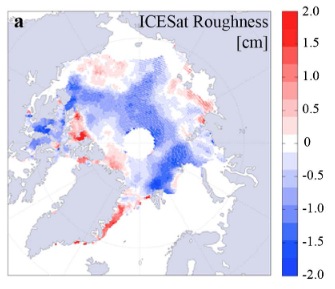

Will the change in surface roughness impact sea ice trends by impacting ice velocity or wind speeds? In the SMOOTH experiments we have decreased the surface roughness over sea ice to make ice as smooth as the open ocean to test this hypothesis. One ensemble member was run from 1950-2015 with the smoother surface. At 2015 five ensembles were run using a micro-perturbation initialization (DuVivier et al. 2023).

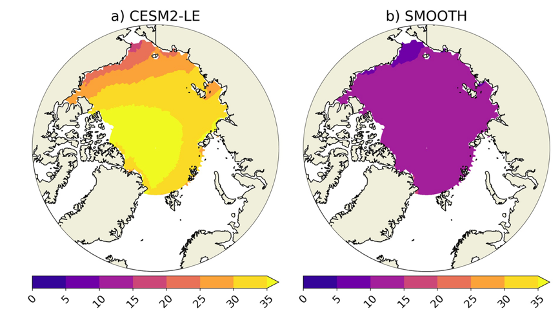

Sea ice-air drag coefficient (unitless)

- DuVivier et al. 2023. “Investigating future Arctic sea ice loss and near‐surface wind speed changes related to surface roughness using the Community Earth System Model.” https://doi.org/10.1029/2023JD0388
- Landy et al. 2015. "Albedo feedback enhanced by smoother Arctic sea ice." https://doi.org/10.1002/2015GL06671

- 
Rodgers et al. 2021. “Ubiquity of human-induced changes in climate variabi"tiy". https://doi.org/10.5194/esd-12-1393-021


In [ ]:
# Load packages we'll need
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and manipulate all the data

In [ ]:
# set data directory
data_dir = 'data/'

## Load and subset CESM2-LE data
- Keep just September data

In [ ]:
# Set the data to input
fin = 'LE2_aicetot_nh_1870-2100.nc'

# read in the data
ds1 = xr.open_dataset(data_dir + fin)

In [ ]:
# keep only September data (note that indexing starts at 0, so September is month 8)
# Note: you MUST uncomment and set a value for the month value, below

#mm = 
data1 = ds1.aice_monthly.isel(nmonth=mm)

In [ ]:
# convert data from m^2 to km^2
data1 = data1/(1000.0 * 1000.0)

In [ ]:
# create an array of years for this data
years_data1 = np.arange(1870,2101,1)

In [ ]:
# look at data
data1

### Questions:
- How many years of data do we have?
- How many ensemble members are there?

## Load and subset CESM2 surface roughness experiments
- Keep just September data
- Data is already in km^2, so no conversion is needed

In [ ]:
# Set the data to input
fin = 'SMOOTH_aicetot_nh_1950-2100.nc'

# read in the data
ds2 = xr.open_dataset(data_dir + fin)

In [ ]:
# keep only September data (note that it's not yet broken into months, so we filter data differently and use index 9 for September)
# Note: you MUST uncomment and set a value for the month value, below

#mm = 
data2 = ds2.aice_monthly.sel(time=ds2.time.dt.month.isin(mm))

In [ ]:
# get an array of years for this data
years_data2 = data2.time.dt.year.values

In [ ]:
# look at data
data2

### Questions:
- How many years of data do we have?
- How many ensemble members are there?
- Why do you think there are less of both of these? (Hint: how expensive it is to run an ESM?)

# Exercise 1

- Activity: Plot the ensemble means and standard deviations for CESM2-LE

In [ ]:
# calculate CESM2-LE ensemble mean and standard deviation
data1_mean = data1.mean(dim='n_members')
data1_std = data1.std(dim='n_members')

# get the total number of ensemble members 
n_ens_1 = len(data1.n_members)

In [ ]:
# create figure
fig = plt.figure(figsize=(20,10))

###
# plot all CESM2-LE model data
###
ii=0
for ii in range(n_ens_1):
    plt.plot(years_data1,data1[ii,:],color="lightgrey",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data1,data1.isel(n_members=0),label='CESM2-LE Ensembles',color='lightgrey',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data1,data1_mean,label='CESM2-LE Ens_mean',color='black',linestyle='-',linewidth=3)
plt.plot(years_data1,data1_mean+data1_std,label='+1std',color='black',linestyle=':',linewidth=2)
plt.plot(years_data1,data1_mean-data1_std,label='-1std',color='black',linestyle=':',linewidth=2)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1870,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower left', fontsize=15, ncol=1);

### Questions:
- How does this compare to the CESM1-LE we previously examined? Is it similar to what you expect?
- Is there anything that looks weird in this timeseries?

# Exercise 2
- Activity: Plot the ensemble means and standard deviations for CESM2-LE and the experiment

In [ ]:
# calculate ensemble mean and standard deviation
data2_mean = data2.mean(dim='member_id')
data2_std = data2.std(dim='member_id')

# get the total number of ensemble members 
n_ens_2 = len(data2.member_id)

In [ ]:
# create figure
fig = plt.figure(figsize=(20,10))

###
# plot all CESM2-LE model data
###
ii=0
for ii in range(n_ens_1):
    plt.plot(years_data1,data1[ii,:],color="lightgrey",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data1,data1.isel(n_members=0),label='CESM2-LE Ensembles',color='lightgrey',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data1,data1_mean,label='CESM2-LE Ens_mean',color='black',linestyle='-',linewidth=3)
plt.plot(years_data1,data1_mean+data1_std,label='+1std',color='black',linestyle=':',linewidth=2)
plt.plot(years_data1,data1_mean-data1_std,label='-1std',color='black',linestyle=':',linewidth=2)
###
# plot all experimental model data
###
ii=0
for ii in range(n_ens_2):
    plt.plot(years_data2,data2[:,ii],color="salmon",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data2,data2.isel(member_id=0),label='Expt Ensembles',color='salmon',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data2,data2_mean,label='Expt Ens_mean',color='firebrick',linestyle='-',linewidth=3)
plt.plot(years_data2,data2_mean+data2_std,label='+1std',color='firebrick',linestyle=':',linewidth=2)
plt.plot(years_data2,data2_mean-data2_std,label='-1std',color='firebrick',linestyle=':',linewidth=2)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1870,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower left', fontsize=15, ncol=2);

### Questions:
- Why does the experiment only have one ensemble from 1950-2015? (Hint: how expensive it is to run an ESM?)

## Exercise 3

- Now, zoom in on the previous figure years

In [ ]:
# create figure
fig = plt.figure(figsize=(20,10))

###
# plot all CESM2-LE model data
###
ii=0
for ii in range(n_ens_1):
    plt.plot(years_data1,data1[ii,:],color="lightgrey",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data1,data1.isel(n_members=0),label='CESM2-LE Ensembles',color='lightgrey',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data1,data1_mean,label='CESM2-LE Ens_mean',color='black',linestyle='-',linewidth=3)
plt.plot(years_data1,data1_mean+data1_std,label='+1std',color='black',linestyle=':',linewidth=2)
plt.plot(years_data1,data1_mean-data1_std,label='-1std',color='black',linestyle=':',linewidth=2)
###
# plot all experimental model data
###
ii=0
for ii in range(n_ens_2):
    plt.plot(years_data2,data2[:,ii],color="salmon",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data2,data2.isel(member_id=0),label='Expt Ensembles',color='salmon',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data2,data2_mean,label='Expt Ens_mean',color='firebrick',linestyle='-',linewidth=3)
plt.plot(years_data2,data2_mean+data2_std,label='+1std',color='firebrick',linestyle=':',linewidth=2)
plt.plot(years_data2,data2_mean-data2_std,label='-1std',color='firebrick',linestyle=':',linewidth=2)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([2015,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0,5000000])
plt.legend(loc='upper right', fontsize=15, ncol=2);

### Questions:
- How does the experiment look different than the CESM2-LE? (Mean state and trends)
- Do you think that changing the surface smoothing leads to statistically significant changes in total sea ice area?
- Do you think that there are enough of the experimental ensembles to be certain of your conclusions?
- Are there other aspects of the sea ice state or Earth system you think would be interesting to investigate in these experiments? (e.g. sea ice thickness, sea surface temperature, cloud cover, etc.)